In [1]:
"Ce fichier permet de simuller une antenne ifa avec les parametres optimisés obtenue du script ifa_meander_optimize.py"

'Ce fichier permet de simuller une antenne ifa avec les parametres optimisés obtenue du script ifa_meander_optimize.py'

In [2]:
from utils.ifa_meander_project_v2.geometry import *
from utils.ifa_meander_project_v2.meshing import *
from utils.ifa_meander_project_v2.frequency import *
from utils.ifa_meander_project_v2.simulation import *

In [3]:
fLow = 700e6
fHigh = 1000e6
fC = 868e6
step = 4e6

frequencies, fc_index, nPoints = generate_frequencies(fLow, fHigh, fC, step)

print(f"Nombre de fréquences (nPoints) : {nPoints}")
print(f"Index de fC : {fc_index}")


Nombre de fréquences (nPoints) : 76
Index de fC : 42


In [4]:
mesh_name = "sim_optimize_ifa.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/sim_optimize_ifa.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [5]:
a = 27 / 1000  # Largeur
b = 55 / 1000  # Hauteur

terminal_a = 92 / 1000
terminal_b = b
x_t = np.array([-terminal_a + a, 0, 0, -terminal_a + a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# On fixe le short feed et la largur de piste
largeur_piste    = 5.400 / 1000
distance_meandre = 8.100 / 1000
feed = 31.239 / 1000  
feed_point       = [0, feed, 0]

mesh_size = 21.60 / 1000

In [6]:
def creation_ifa(largeur, hauteur, width, dist_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width # La largeur de la piste est la meme partout
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

def plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC=None):
    from matplotlib import pyplot as plt
    frequencies = np.linspace(fLow, fHigh, nPoints)
    frequencies_mhz = np.array(frequencies) / 1e6
    s11_db = np.array(s11_db)

    # Trouver le minimum de S11
    min_index = np.argmin(s11_db)
    f_resonance = frequencies[min_index] / 1e6
    s11_min = s11_db[min_index]

    # Tracé
    fig_size = 7
    Fibonacci = (1 + np.sqrt(5)) / 2
    plt.figure(figsize=(fig_size, fig_size / Fibonacci))
    plt.plot(frequencies_mhz, s11_db, label="S11 (dB)", color='blue')
    plt.plot(f_resonance, s11_min, 'ro', 
            label=f"Résonance: {f_resonance:.2f} MHz (S11={s11_min:.2f} dB)")
    
    if fC:
        fC_mhz = fC / 1e6
        idx_fc = np.argmin(np.abs(frequencies - fC))
        s11_fc = s11_db[idx_fc]
        plt.axvline(fC_mhz, color='green', linestyle='--', 
                   label=f"fC = {fC_mhz:.2f} MHz (S11={s11_fc:.2f} dB)")

    plt.xlabel("Fréquence (MHz)")
    plt.ylabel("S11 (dB)")
    plt.title("Courbe de S11 vs Fréquence")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

distance meandres 8.1 mm
Largeur de piste ifa 5.4 mm
position feed = 31.239 mm

Number of meanders 2
New distance meandres 8.1 mm

Nombre d'elements de maillage (edges) = 55

Simulation 1/76 | f = 700.00 MHz | S11 = -0.71 dB

Nombre d'elements de maillage (edges) = 55

Simulation 2/76 | f = 704.00 MHz | S11 = -0.75 dB

Nombre d'elements de maillage (edges) = 55

Simulation 3/76 | f = 708.00 MHz | S11 = -0.80 dB

Nombre d'elements de maillage (edges) = 55

Simulation 4/76 | f = 712.00 MHz | S11 = -0.85 dB

Nombre d'elements de maillage (edges) = 55

Simulation 5/76 | f = 716.00 MHz | S11 = -0.91 dB

Nombre d'elements de maillage (edges) = 55

Simulation 6/76 | f = 720.00 MHz | S11 = -0.97 dB

Nombre d'elements de maillage (edges) = 55

Simulation 7/76 | f = 724.00 MHz | S11 = -1.04 dB

Nombre d'elements de maillage (edges) = 55

Simulation 8/76 | f = 728.00 MHz | S11 = -1.11 dB

Nombre d'elements de maillage (edges) = 55

Simulation 9/76 | f = 732.00 MHz | S11 = -1.18 dB

Nombre d'eleme

Simulation 43/76 | f = 868.00 MHz | S11 = -32.80 dB

Nombre d'elements de maillage (edges) = 55

Simulation 44/76 | f = 872.00 MHz | S11 = -25.61 dB

Nombre d'elements de maillage (edges) = 55

Simulation 45/76 | f = 876.00 MHz | S11 = -20.89 dB

Nombre d'elements de maillage (edges) = 55

Simulation 46/76 | f = 880.00 MHz | S11 = -17.83 dB

Nombre d'elements de maillage (edges) = 55

Simulation 47/76 | f = 884.00 MHz | S11 = -15.60 dB

Nombre d'elements de maillage (edges) = 55

Simulation 48/76 | f = 888.00 MHz | S11 = -13.87 dB

Nombre d'elements de maillage (edges) = 55

Simulation 49/76 | f = 892.00 MHz | S11 = -12.47 dB

Nombre d'elements de maillage (edges) = 55

Simulation 50/76 | f = 896.00 MHz | S11 = -11.31 dB

Nombre d'elements de maillage (edges) = 55

Simulation 51/76 | f = 900.00 MHz | S11 = -10.32 dB

Nombre d'elements de maillage (edges) = 55

Simulation 52/76 | f = 904.00 MHz | S11 = -9.47 dB

Nombre d'elements de maillage (edges) = 55

Simulation 53/76 | f = 908.00 M

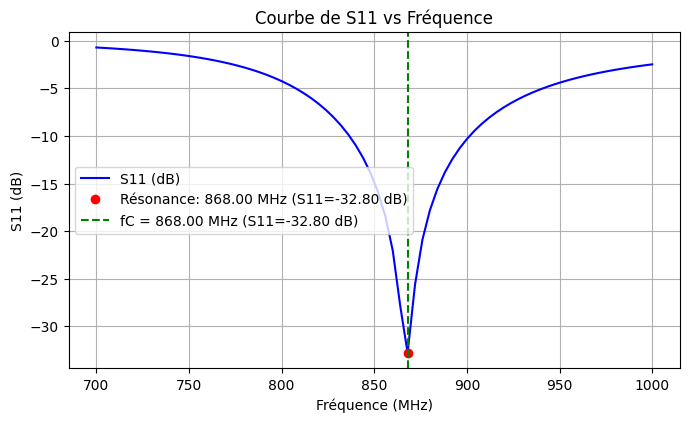

In [7]:
print(f"distance meandres {distance_meandre * 1000} mm")
print(f"Largeur de piste ifa {largeur_piste * 1000} mm")
print(f"position feed = {feed * 1000} mm\n")
N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size)
print(f"Number of meanders {N_list_elem}")
print(f"New distance meandres {new_distance_meandre_elem * 1000} mm")
feed_point    = [0, feed, 0]
frequence_resonance, s11_db, R_res, X_res = simulate(frequencies, ifa_meander_mat, fC, feed_point)
plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
